In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# traitement réalisés précédemment
prets = pd.read_csv("D:\Dev\Mes fichiers Python\Fichiers de données\prets_final.csv")

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


In [4]:
type_agreg = prets.groupby('type').size().reset_index()
print (type_agreg)

         type    0
0  automobile   16
1  immobilier  228


In [5]:
type_agreg1 = prets['type'].value_counts().reset_index()
print (type_agreg1)

        index  type
0  immobilier   228
1  automobile    16


([<matplotlib.patches.Wedge at 0x23407b7dd30>,
 [Text(-1.0767412667284106, 0.22500720993803233, 'immobilier'),
  Text(1.0767412772617573, -0.22500715953213574, 'automobile')],
 [Text(-0.5873134182154967, 0.1227312054207449, '93.44%'),
  Text(0.5873134239609584, -0.12273117792661947, '6.56%')])

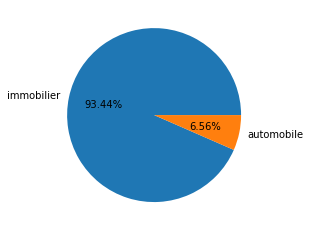

In [27]:
plt.pie(x=type_agreg1['type'], labels=type_agreg1['index'], autopct='%.2f%%')

In [48]:
# 2. bénéfice mensuel réalisé en fonction du revenu du client
df1 = prets.groupby('identifiant',as_index=False)['benefices'].sum()
df1.head()

,identifiant,benefices
0,0,131.99
1,1,206.66
2,2,53.71
3,3,44.57
4,4,51.21


In [49]:
df2 = prets.groupby('identifiant',as_index=False)['revenu'].sum()
df2.head()

,identifiant,revenu
0,0,3669.0
1,1,10620.0
2,2,1873.0
3,3,1684.0
4,4,1476.0


In [51]:
# df3 = pd.merge(df1, df2, on = 'idendifiant', how = 'inner')

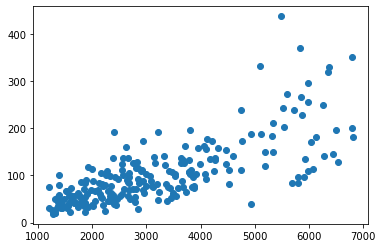

In [54]:
prets_immobilier = prets.loc[(prets['type']=='immobilier'),:]
plt.scatter(prets_immobilier['revenu'], prets_immobilier['benefices'])

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

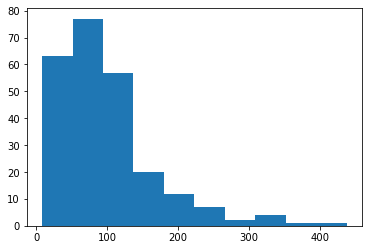

In [55]:
plt.hist(prets['benefices'])

<BarContainer object of 6 artists>

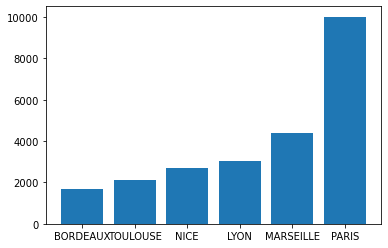

In [62]:
benef_agence = prets.groupby('ville')['benefices'].sum().reset_index()
benef_agence2 = benef_agence.sort_values('benefices')
plt.bar(height=benef_agence2['benefices'], x=benef_agence2['ville'])